In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from pylab import rcParams

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [71]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [73]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    education_df.loc[:, col] = education_df.loc[:, col].interpolate()
education_df.dropna(inplace=True)

In [74]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,...,467.000000,467.000000,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,467.000000,467.000000,467.000000,467.000000
mean,2008.550321,1.003637e+06,1.175375e+07,1.012277e+06,5.273263e+06,5.468209e+06,1.180621e+07,6.119717e+06,3.503117e+06,5.251638e+05,...,65003.784797,65545.320128,57698.214133,5.238405e+05,2.569285e+05,8.340740e+05,236.880362,279.791910,219.507572,263.770101
std,5.802835,1.075847e+06,1.296841e+07,1.270137e+06,5.953353e+06,6.233220e+06,1.314155e+07,6.899971e+06,3.734121e+06,5.710636e+05,...,84029.013431,83750.968325,74806.197075,6.748688e+05,3.312412e+05,9.804657e+05,8.709717,9.374323,7.418609,6.881618
min,1996.000000,4.417900e+04,6.640570e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.763050e+05,3.182600e+05,2.002280e+05,2.191000e+04,...,1212.000000,1103.000000,1024.000000,9.403000e+03,5.084000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.949100e+05,2.961662e+06,2.942850e+05,1.705310e+06,1.121300e+06,2.992256e+06,1.577282e+06,8.925940e+05,1.428942e+05,...,12895.000000,12992.500000,10873.500000,1.045745e+05,5.001650e+04,2.752905e+05,232.709870,274.725352,215.366575,259.589293
50%,2009.000000,7.374010e+05,7.111710e+06,6.393080e+05,3.320196e+06,2.866158e+06,7.253850e+06,3.663594e+06,2.149761e+06,3.687500e+05,...,43436.000000,43653.000000,38834.000000,3.457750e+05,1.740040e+05,5.338530e+05,238.366542,281.503601,221.096695,265.194041
75%,2013.000000,1.435529e+06,1.760775e+07,1.376490e+06,7.623950e+06,8.065686e+06,1.725249e+07,8.999806e+06,5.024066e+06,8.041105e+05,...,76440.000000,76791.000000,70667.000000,6.137725e+05,2.962715e+05,9.285425e+05,242.600258,286.195612,224.530382,268.299906
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [75]:
education_df['winsorized_revenue'] = winsorized_revenue = winsorize(education_df['TOTAL_REVENUE'] , (0,0.10))

In [76]:
education_df.columns


Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'winsorized_revenue'],
      dtype='object')

In [77]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorized_revenue
count,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,...,467.000000,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,467.000000,467.000000,467.000000,467.000000,4.670000e+02
mean,2008.550321,1.003637e+06,1.175375e+07,1.012277e+06,5.273263e+06,5.468209e+06,1.180621e+07,6.119717e+06,3.503117e+06,5.251638e+05,...,65545.320128,57698.214133,5.238405e+05,2.569285e+05,8.340740e+05,236.880362,279.791910,219.507572,263.770101,1.006168e+07
std,5.802835,1.075847e+06,1.296841e+07,1.270137e+06,5.953353e+06,6.233220e+06,1.314155e+07,6.899971e+06,3.734121e+06,5.710636e+05,...,83750.968325,74806.197075,6.748688e+05,3.312412e+05,9.804657e+05,8.709717,9.374323,7.418609,6.881618,8.286928e+06
min,1996.000000,4.417900e+04,6.640570e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.763050e+05,3.182600e+05,2.002280e+05,2.191000e+04,...,1103.000000,1024.000000,9.403000e+03,5.084000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102,6.640570e+05
25%,2005.000000,2.949100e+05,2.961662e+06,2.942850e+05,1.705310e+06,1.121300e+06,2.992256e+06,1.577282e+06,8.925940e+05,1.428942e+05,...,12992.500000,10873.500000,1.045745e+05,5.001650e+04,2.752905e+05,232.709870,274.725352,215.366575,259.589293,2.961662e+06
50%,2009.000000,7.374010e+05,7.111710e+06,6.393080e+05,3.320196e+06,2.866158e+06,7.253850e+06,3.663594e+06,2.149761e+06,3.687500e+05,...,43653.000000,38834.000000,3.457750e+05,1.740040e+05,5.338530e+05,238.366542,281.503601,221.096695,265.194041,7.111710e+06
75%,2013.000000,1.435529e+06,1.760775e+07,1.376490e+06,7.623950e+06,8.065686e+06,1.725249e+07,8.999806e+06,5.024066e+06,8.041105e+05,...,76791.000000,70667.000000,6.137725e+05,2.962715e+05,9.285425e+05,242.600258,286.195612,224.530382,268.299906,1.760775e+07
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130,2.376653e+07


In [78]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorized_revenue
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,3365113.0
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,4143304.0
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,2183384.0
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,23766529.0
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,3891203.0


In [79]:
co_df = education_df.loc[education_df['STATE'] =='COLORADO']

In [80]:
co_df['winsorized_revenue'] = winsorized_revenue = winsorize(co_df['TOTAL_REVENUE'],(0,0.10))

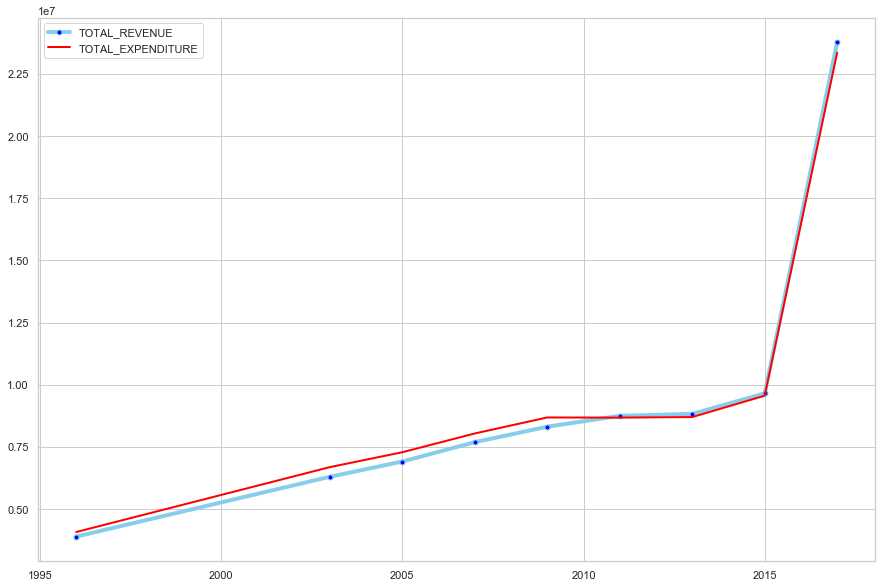

In [81]:
plt.plot( 'YEAR', 'TOTAL_REVENUE', data=co_df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=4)
plt.plot( 'YEAR', 'TOTAL_EXPENDITURE', data=co_df, marker='', color='red', linewidth=2)
rcParams['figure.figsize'] = 15, 10
plt.legend()
plt.show()


It seems like the revenue and expenditure have increased steadily over the past 25 years or so but there is noticiably enormous jump in both revenue and expenditure in 2016

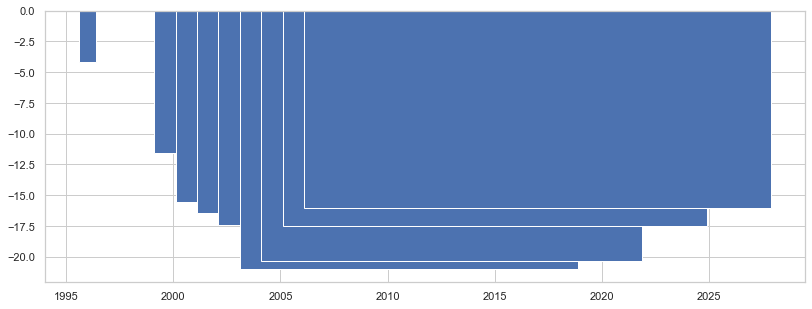

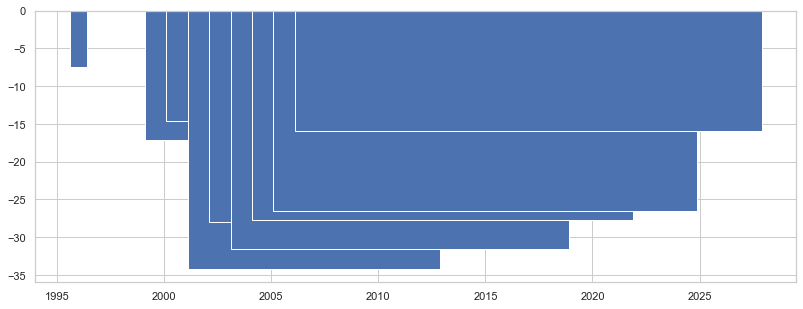

In [82]:
plt.figure(figsize=(30,5))
height = (co_df['AVG_READING_4_SCORE']-co_df['AVG_MATH_4_SCORE'])
bars = co_df['YEAR']
plt.subplot(1,2,1)
plt.bar(bars, height)
plt.show()

plt.figure(figsize=(30,5))
height = (co_df['AVG_READING_8_SCORE']-co_df['AVG_MATH_8_SCORE'])
bars = co_df['YEAR']
plt.subplot(1,2,2)
plt.bar(bars, height)
plt.show()

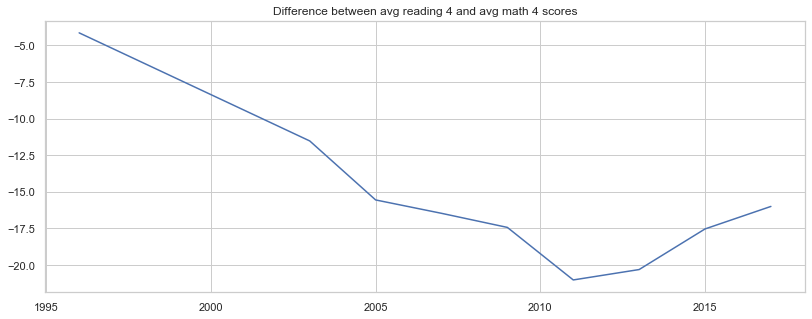

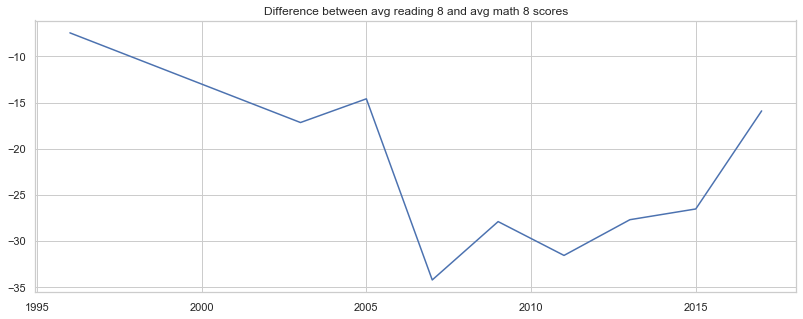

In [83]:
plt.figure(figsize=(30,5))
height = (co_df['AVG_READING_4_SCORE']-co_df['AVG_MATH_4_SCORE'])
bars = co_df['YEAR']
plt.subplot(1,2,1)
plt.plot(bars, height)
plt.title('Difference between avg reading 4 and avg math 4 scores')
plt.show()

plt.figure(figsize=(30,5))
height = (co_df['AVG_READING_8_SCORE']-co_df['AVG_MATH_8_SCORE'])
bars = co_df['YEAR']
plt.subplot(1,2,2)
plt.plot(bars, height)
plt.title('Difference between avg reading 8 and avg math 8 scores')
plt.show()

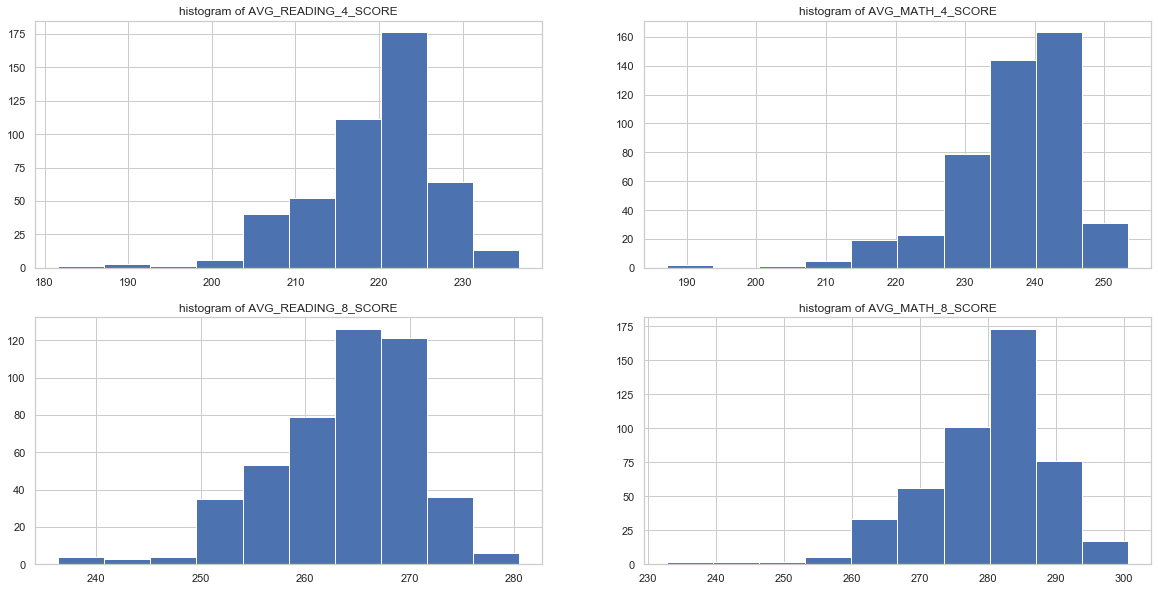

In [84]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

In [86]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

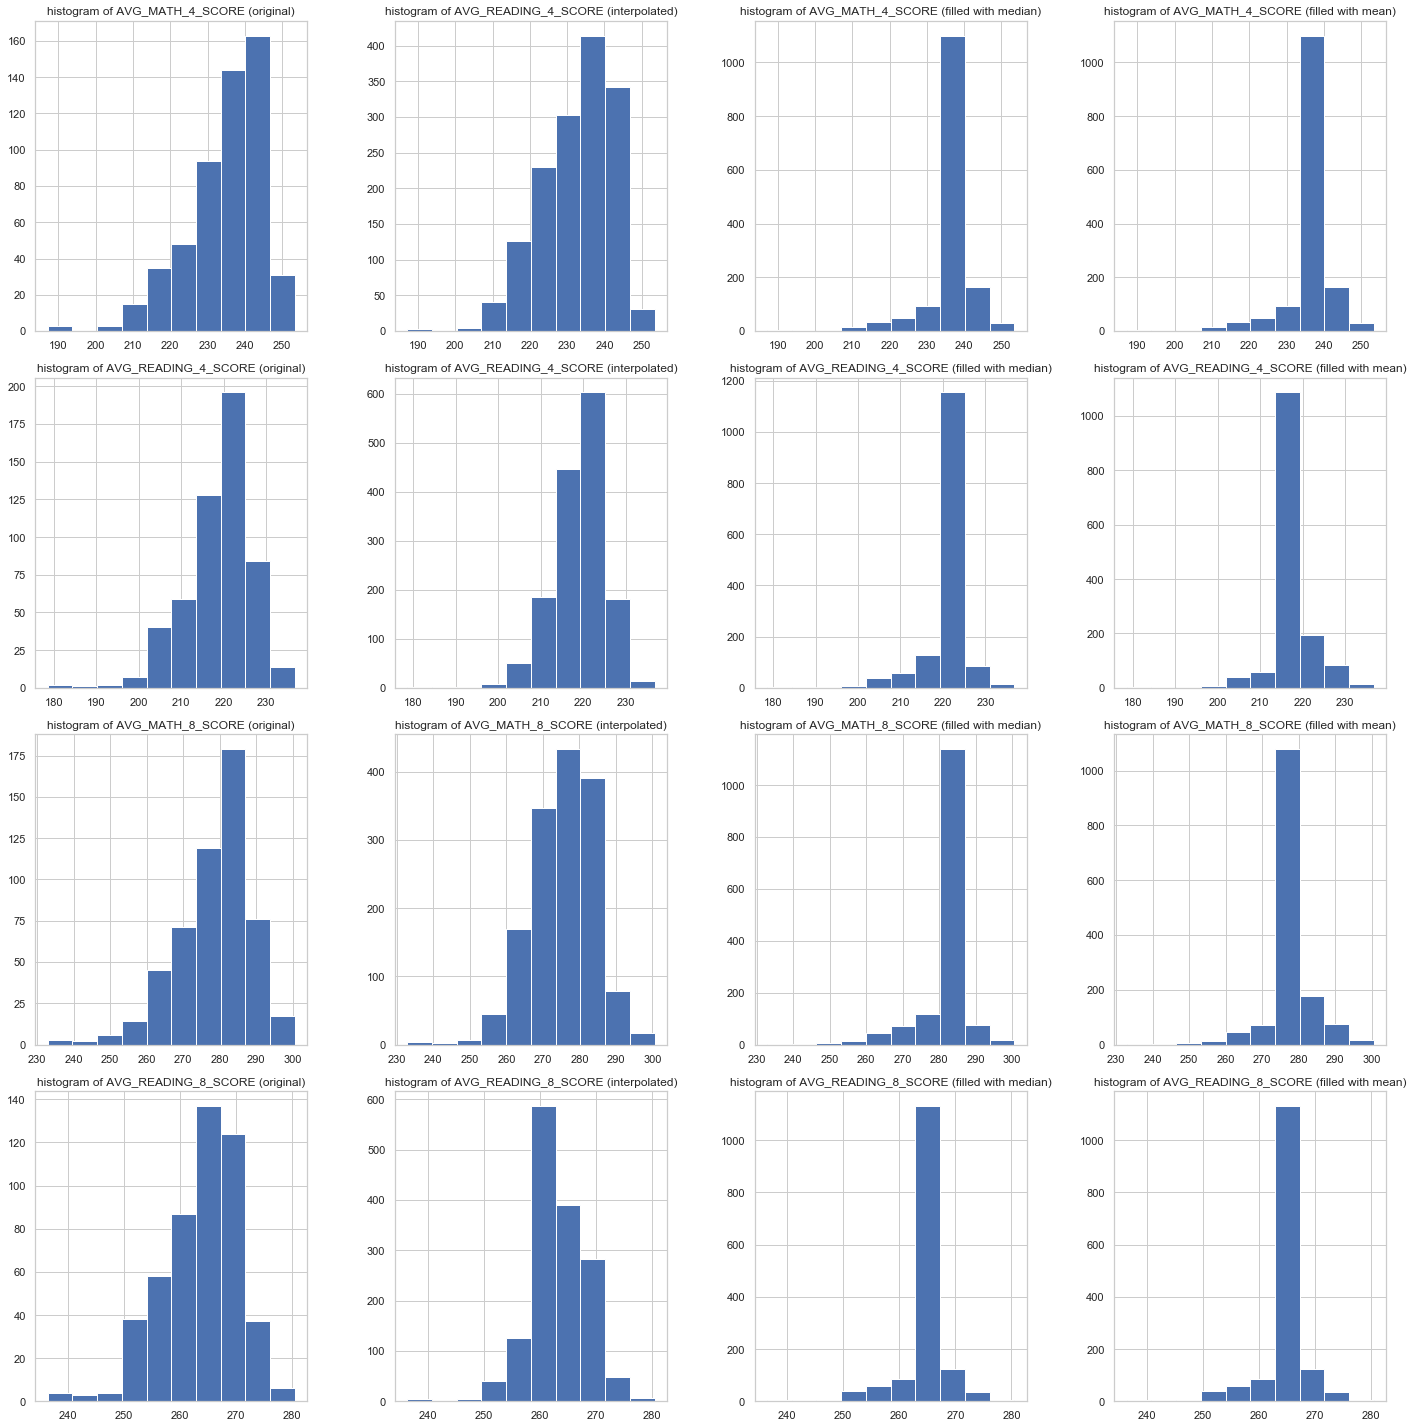

In [87]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()